   Transaction_ID         Products   Price  Quantity        Date
0               1  SepatuKetsPutih  140000         3  2024-10-15
1               2  BajuMusimDingin  200000         2  2024-10-18
2               3       JaketKulit  350000         1  2024-10-20
3               4     JeansSlimFit   90000         4  2024-10-22
4               5       SabukKulit   25000         5  2024-10-23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction_ID  50 non-null     int64 
 1   Products        50 non-null     object
 2   Price           50 non-null     int64 
 3   Quantity        50 non-null     int64 
 4   Date            50 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
       Transaction_ID          Price   Quantity
count        50.00000      50.000000  50.000000
mean         25.50000  114620.000000   4.840000
s

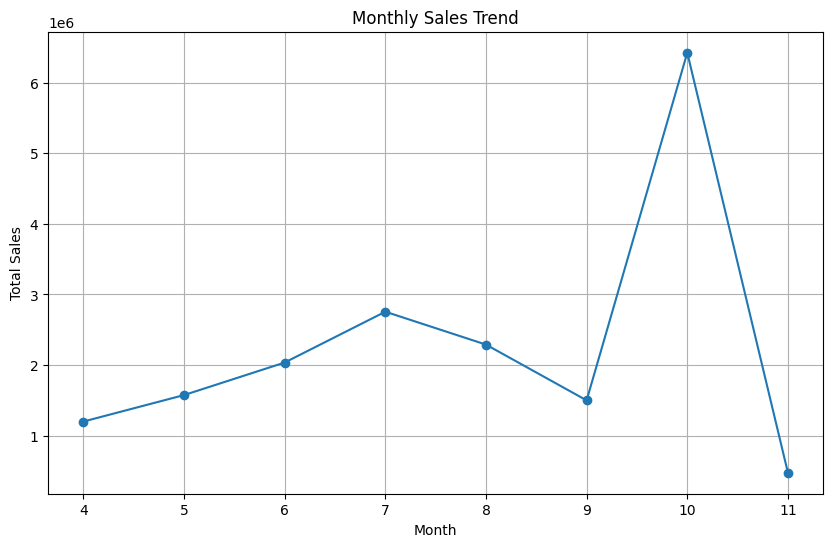

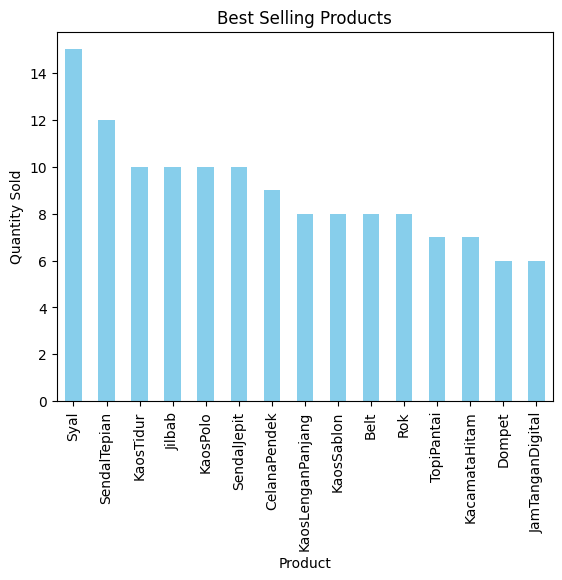

Root Squared Error (RSE): 1630042.62


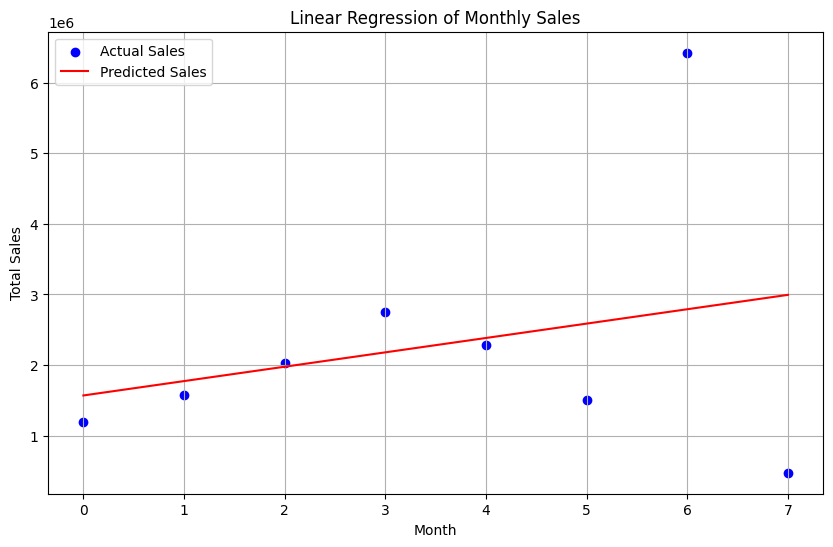

In [4]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 2. Load Data
data = pd.read_csv('sales3.csv')

# 3. Viewing the Top Five Data
print(data.head())

# 4. Check Dataset General Information
print(data.info())

# 5. Check Descriptive Statistics
print(data.describe())

# 6. Adding 'Total Sales' Column (Price * Number of Products)
data['Total Sales'] = data['Price'] * data['Quantity']

# 7. Display Best Selling Products
top_products = data.groupby('Products')['Quantity'].sum().sort_values(ascending=False).head(15)
print("Top 15 Best Selling Products:")
print(top_products)

# 8. Calculate Total Sales for Top 15 Products
top_products_data = data[data['Products'].isin(top_products.index)]
total_sales = top_products_data['Total Sales'].sum()
print(f"Total Sales from Top 15 Products: {total_sales}")

# 9. Sales Performance Evaluation
target_sales = 10000000
performance_percentage = (total_sales / target_sales) * 100

if performance_percentage > 70:
    performance_status = "Penjualan sesuai target"
elif 40 <= performance_percentage <= 70:
    performance_status = "Penjualan hampir mencapai target"
else:
    performance_status = "Hasil penjualan jauh dari target"

print(f"Performance Status: {performance_status} ({performance_percentage:.2f}%)")

# 10. Monthly Sales Analysis
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
monthly_sales = data.groupby('Month')['Total Sales'].sum()

# 11. Monthly Sales Visualization
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

# 12. Best Selling Product Visualization
top_products.plot(kind='bar', color='skyblue')
plt.title('Best Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

# 13. Linear Regression Analysis
X = np.array(range(len(monthly_sales))).reshape(-1, 1)  # Months as independent variable
y = monthly_sales.values  # Total sales as dependent variable

model = LinearRegression()
model.fit(X, y)

# 14. Predictions and RSE Calculation
predictions = model.predict(X)
rse = np.sqrt(np.mean((predictions - y) ** 2))
print(f"Root Squared Error (RSE): {rse:.2f}")

# 15. Display Linear Regression Results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Sales')
plt.plot(X, predictions, color='red', label='Predicted Sales')
plt.title('Linear Regression of Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()